In [21]:
from traffic import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statistics as st

# Creation of Car and Simulation Objects
In this code, the parade of cars is created as new objects and passed to the simulation object. Some sample runs are then performed and representative outputs of the system's state are offered at the end.

In [3]:
Ncars = 30
positions = np.linspace(0, 1000, num=Ncars+1)
cars = [Car(positions[i]) for i in range(Ncars)]
for i in range(Ncars-1):
    cars[i].set_next(cars[i+1])
cars[Ncars-1].set_next(cars[0])

Above code establishes the array of cars needed

In [4]:
sim = Simulation(cars)
sim.run_once()

This snippet establishes the simulation and does a single round

In [5]:
sim.run(5)

Here, it is run for a few seconds

In [6]:
x_vals = np.linspace(0, Ncars, num=Ncars)

In [7]:
def plot_things():
    plt.plot(x_vals, sim.dist_array())
    plt.title("Distance to next car (m)")
    plt.xlabel("Car number")
    plt.ylabel("m")
    plt.show()

    plt.plot(x_vals, sim.speed_array())
    plt.title("Speed of car (m/s)")
    plt.xlabel("Car number")
    plt.ylabel("m/s")
    plt.axis((0,Ncars,0,35))
    plt.show()

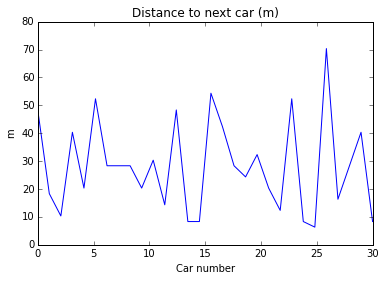

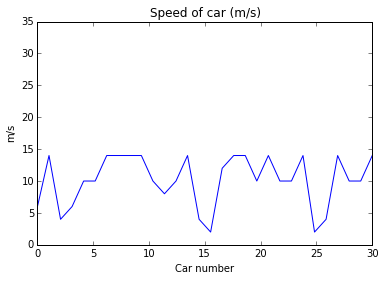

In [8]:
plot_things()

All cars begin with a speed of zero. In this cross-section of the simulation, even the fastest cars are still accelerating. They can increase speed by 2 m/s per second at most, and their top speed is 33.3 m/s. At this point, they have ran for 6 seconds, yielding a maximum speed of 12 m/s, which corresponds to the data on the plot. In spite of being early in the simulation, substantial variation in positions is already revealing itself.

In [9]:
sim.run(60)

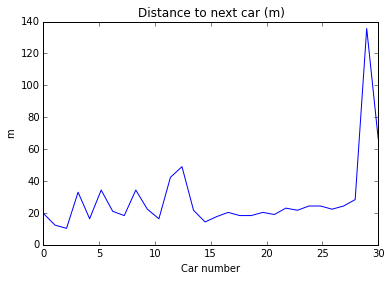

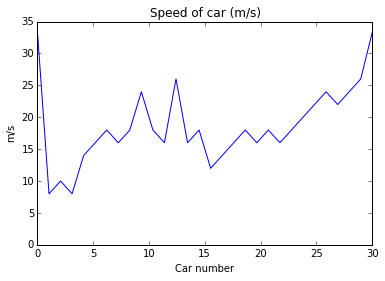

In [10]:
plot_things()

After 1 more minute, the cars have had sufficient time to accelerate to full speed. Yet, there is a very large amount of variation in the car spacing distance as well as the speed. Only a select few cars have been able to accelerate to a level close to their maximum speed. The rest of the cars are somehow constrained by the proximity of the car in front of them, and that's what most of the speed values represent.

In [11]:
sim = Simulation(cars) # reset

In [19]:
Ntime = 2000 # 2,000 seconds = 33.3 minutes
avg_speed = [0] * Ntime
time_plt = [i for i in range(Ntime)]
full_hist = [[0 for i in range(Ncars)] for j in range(Ntime)]
speed_list = []
for i in range(Ntime):
    speed_list.append(sim.speed_array().tolist()[0])
    avg_speed[i] = sim.speed_array().mean()
    full_hist[i] = sim.pos_array()
    sim.run_once()

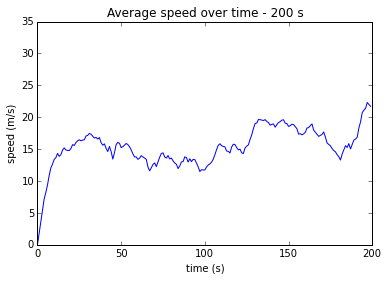

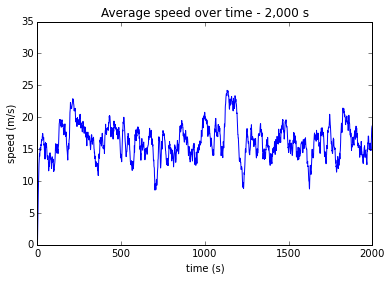

In [13]:
plt.plot(time_plt[:int(Ntime/10)], avg_speed[:int(Ntime/10)])
plt.title("Average speed over time - 200 s")
plt.xlabel("time (s)")
plt.ylabel("speed (m/s)")
plt.axis((0,int(Ntime/10),0,35))
plt.show()

plt.plot(time_plt, avg_speed)
plt.title("Average speed over time - 2,000 s")
plt.xlabel("time (s)")
plt.ylabel("speed (m/s)")
plt.axis((0,Ntime,0,35))
plt.show()

These graphs show the evolution of the average car speed over two time frames. It is seen that speed increases quickly from zero to around 15 m/s, but then some resistence is obviously being encountered due to traffic jams. Over a longer-time picture, there is clear a large amount of natural variation about the mean.

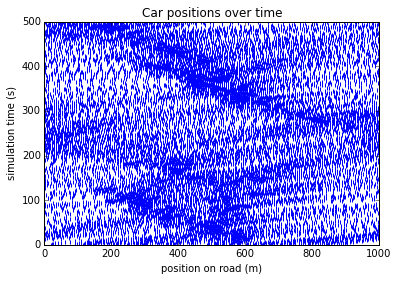

In [15]:
maxt = 500
for k in range(maxt):
    plt.scatter(full_hist[k], [k for i in range(Ncars)], marker=u'|')
plt.title("Car positions over time")
plt.xlabel("position on road (m)")
plt.ylabel("simulation time (s)")
plt.axis((0, 1000, 0, maxt))
plt.show()

This graphic shows traffic waves develop and propogate over time. There seems to be a constant rate of movement of the wave-front in the reverse of the direction of car motion. However, the behavior is overall rather complicated with some forking and diverging also seen.

In [27]:
print(st.stdev(speed_list))
print(st.mean(speed_list))
spd_limit = st.mean(speed_list)+st.stdev(speed_list) # 1 standard deviation above the mean
print(spd_limit)
spd_limit = int(spd_limit*3600/1000) # convert to km/hr, round down for driver
print(spd_limit)

9.897095594508176
16.1696295
26.066725094508175
93


This concludes our reccomendation with an answer of 93 km/hr for the speed limit of the road.